#Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Importing Required Preporcessing functions and Models

In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# 1. Importing Data

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\hyundi.csv")

In [4]:
df

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


# 2. Checking Size and shape of the Data

In [5]:
df.size

43740

In [6]:
df.shape

(4860, 9)

# Missing Value Analysis

In [7]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

In [8]:
##There are no NULL values

In [9]:
for i in df.columns:
    print(df[i].unique(),'\n')

[' I20' ' Tucson' ' I10' ' IX35' ' I30' ' I40' ' Ioniq' ' Kona'
 ' Veloster' ' I800' ' IX20' ' Santa Fe' ' Accent' ' Terracan' ' Getz'
 ' Amica'] 

[2017 2016 2015 2018 2019 2013 2014 2011 2012 2020 2010 2008 2009 2000
 2005 2007 2003 2002 2006] 

[ 7999 14499 11399 ...  8680  6830 13994] 

['Manual' 'Automatic' 'Semi-Auto' 'Other'] 

[17307 25233 37877 ... 13810 23313 11472] 

['Petrol' 'Diesel' 'Hybrid' 'Other'] 

[145 235  30  20 160 125 150 135 200   0 165 265 300 205 140 325 260 240
 330 305 120 190 555 115] 

[ 58.9  43.5  61.7  60.1  51.4  55.4  57.6  56.5  34.9  65.7  44.8  53.3
  78.4  78.5  46.3  45.6  72.4  44.1  52.3  35.3  41.5  61.4  31.7  38.7
  48.7  33.6  64.2  57.7  50.4  47.9  62.8  39.2  47.1  42.8  74.3  28.
  67.3  34.   36.2  42.2   1.1  54.3  46.   39.8  43.6  76.3  68.9  49.6
  35.8  37.7 256.8  37.2  40.9  40.4  70.6  34.5  38.2  32.8  30.4  28.8] 

[1.2 2.  1.7 1.  1.4 1.6 0.  2.5 2.2 1.3 2.9 1.1 2.4] 



In [10]:
for i in df.columns:
  print(df[i].value_counts())

 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: model, dtype: int64
2017    1178
2019    1086
2018     987
2016     716
2015     333
2014     185
2020     159
2013     120
2010      25
2012      22
2011      19
2009      13
2007       6
2008       4
2003       3
2000       1
2005       1
2002       1
2006       1
Name: year, dtype: int64
7995     55
15498    52
8995     43
7495     40
9995     39
         ..
33495     1
30995     1
5910      1
11260     1
13994     1
Name: price, Length: 1685, dtype: int64
Manual       3611
Automatic     669
Semi-Auto     578
Other           2
Name: transmission, dtype: int64
10       38
100      28
5000     28
3000     23
50       19
         ..
14440     1
16483     1
12120     1
26247     1
11472     1
Name:

### findings from the anlysis:
1.  There aare no NULL Values
2.  In enginesize there are 0 values which We consisdered as missing as it is impossible
3.  Model Names are having an extra space considered as Noise in the data
4.  Transmission is having an other value which in current Present era not available

####we will handle all this now

In [11]:
df['model']=df['model'].str.replace(' ','')

In [12]:
df['model'].unique()

array(['I20', 'Tucson', 'I10', 'IX35', 'I30', 'I40', 'Ioniq', 'Kona',
       'Veloster', 'I800', 'IX20', 'SantaFe', 'Accent', 'Terracan',
       'Getz', 'Amica'], dtype=object)

In [13]:
S=df.loc[(df['engineSize']==0)]
for i in S.model.unique():
  for j in S.year.unique():
    for k in S.fuelType.unique():
      for l in S.transmission.unique():
        x=df.loc[(df['model']==i)&(df['year']==j)&(df['fuelType']==k)&(df['transmission']==l)]['engineSize'].mode()
        y=df.loc[(df['model']==i)]['engineSize'].mode()
        if len(x)>0:
          S['engineSize']=S['engineSize'].replace([0.0],x)
        else:
          S['engineSize']=S['engineSize'].replace([0.0],y)
S['engineSize'].unique()

array([2.])

In [14]:
df['engineSize']=df['engineSize'].replace([0],2)

In [15]:
S=df.loc[(df['transmission']=='Other')]
for i in S.model.unique():
  for j in S.year.unique():
    for k in S.fuelType.unique():
      x=df.loc[(df['model']==i)&(df['year']==j)&(df['fuelType']==k)]['transmission'].mode()
      y=df.loc[df['model']==i]['transmission'].mode()
      if x.values.size==0:
        S['transmission']=S['transmission'].str.replace('Other',y.values[0])
      else:
        S['transmission']=S['transmission'].str.replace('Other',x.values[0])
      
S['transmission'].unique()

array(['Automatic'], dtype=object)

In [16]:
df['transmission']=df['transmission'].str.replace('Other','Automatic')

In [17]:
df.shape

(4860, 9)

#4. Checking th column types and describing the columns

In [18]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   tax(£)        4860 non-null   int64  
 7   mpg           4860 non-null   float64
 8   engineSize    4860 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 341.8+ KB


#5. Perform Univariate analysis
1.  Calculate mean, median, std dev, and quartiles of numerical data

In [20]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.477263
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.377544
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,1.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


2. Plot histogram for a few categorical variables

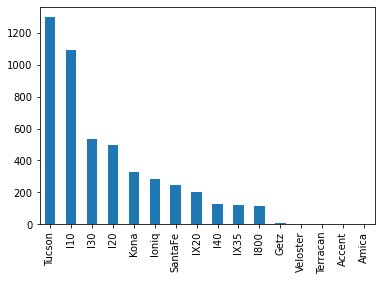

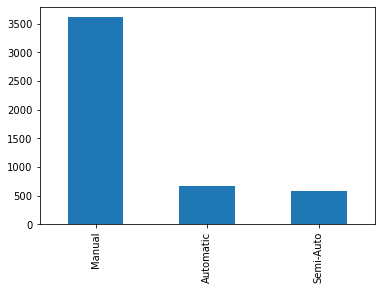

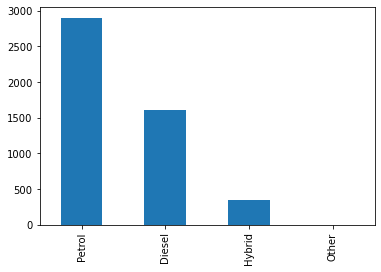

In [21]:
for i in ['model','transmission','fuelType']:
  df[i].value_counts().plot(kind="bar")
  plt.show()

3.  Check the distribution of numerical variables and comment on it

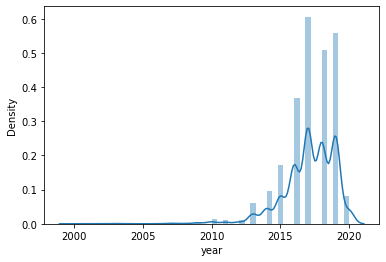

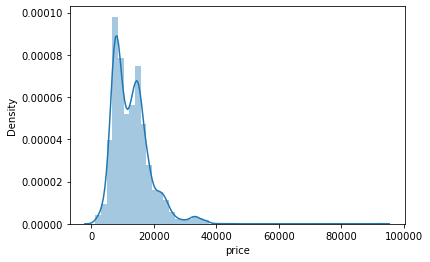

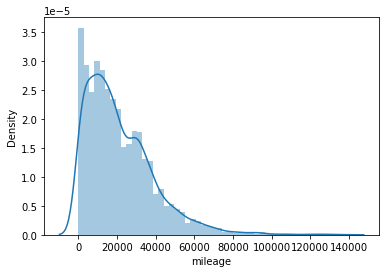

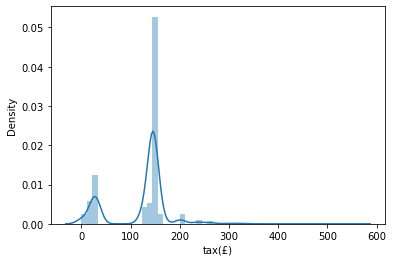

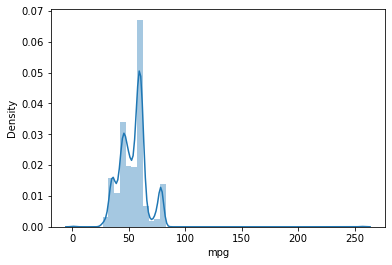

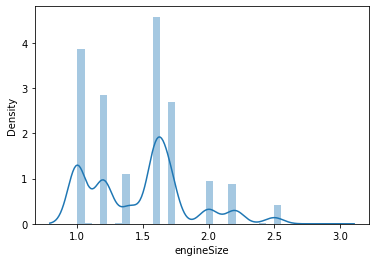

In [22]:
numerical_columns = df[["year","price","mileage","tax(£)","mpg","engineSize"]]

for col in numerical_columns:
    sns.distplot(df[col], kde=True)
    plt.show()

#From the distribution of the Plots we have the following outcomes:
1.  ***Cars on sale are majorly from past 5 years***, possible reasons:
    *  General tendency of people to have a car for 3 to 5 years
    *  People are not much intereseted to buy cars that are used formore than 6 years
2.  Sale prices are kept in specific range knowing the fact that ***customers might not be willing to pay high prices for a used car***
3.  ***Cars are not heavily used*** as the driven Miles are not high. this could be by 2 reasons:
    *  People prefer public transport over personal vehicles
    *  Frequently changing Cars
4.  ***Taxes are having only 2 peaks as UK have specific Tax Structure*** which focuses on the years of manufacturing and total miles driven. Initially it was low but had a rise in the same in 2017
5.  A general average of the cars is **65 miles** per litre Gasoline 
6.  ***Engine sizes are generic and evenly distributed***

#6. Bivariate analysis
1. Pairplots

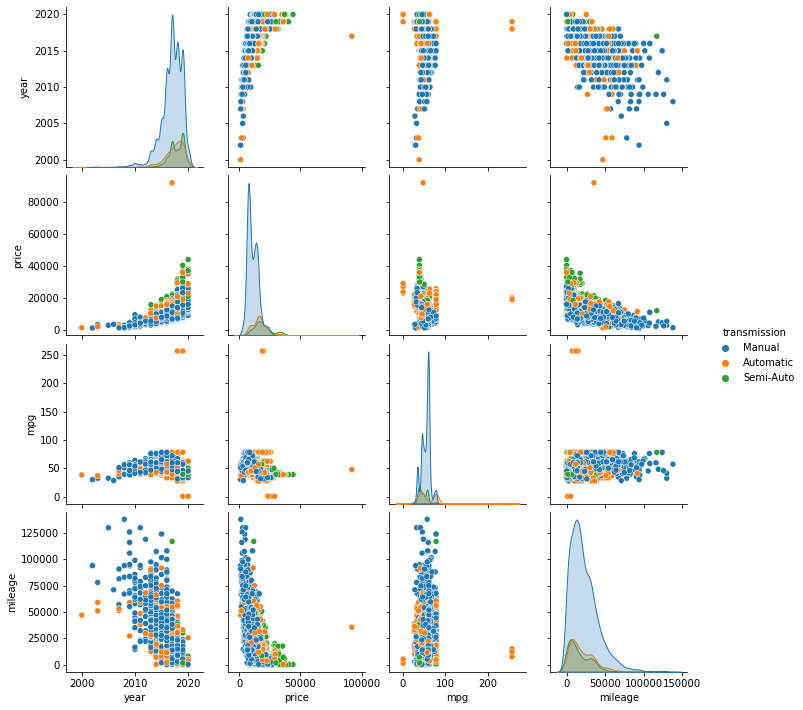

**************************************************************************************
**************************************************************************************


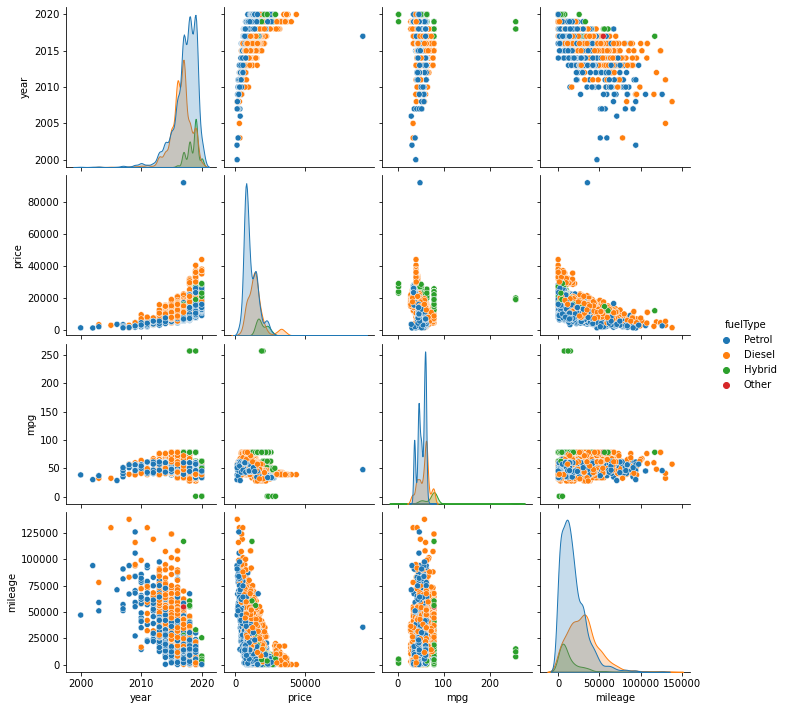

**************************************************************************************
**************************************************************************************


In [23]:
for i in ['transmission','fuelType']:
  sns.pairplot(df[['year','price','mpg','mileage','transmission','fuelType']],hue = i)
  plt.show()
  print('**************************************************************************************\n**************************************************************************************')

# Perform a Chi-square analysis to check whether there is a relationship between 
1. Transmission and FuelType

In [24]:
from scipy.stats import chi2_contingency

In [25]:
Chi_square_statistic,p,dof,expec = chi2_contingency(pd.crosstab(df['transmission'],df['fuelType']))

In [26]:
alpha = 0.05
print('P value is ' + str(p))
if p <= alpha:
    print('Dependent')
    print('D.O.F is ' +str(dof))
else:
    print('Independent')
    print('D.O.F is ' +str(dof))

P value is 0.0
Dependent
D.O.F is 6


2.  Model and FuelType

In [27]:
Chi_square_statistic,p,dof,expec = chi2_contingency(pd.crosstab(df['model'],df['fuelType']))

In [28]:
alpha = 0.05
print('P value is ' + str(p))
if p <= alpha:
    print('Dependent')
    print('D.O.F is ' +str(dof))
else:
    print('Independent')
    print('D.O.F is ' +str(dof))

P value is 0.0
Dependent
D.O.F is 45


3. Pearson correlation with Heatmap

In [29]:
df.corr()['price']

year          0.575765
price         1.000000
mileage      -0.443576
tax(£)        0.321028
mpg          -0.320355
engineSize    0.532686
Name: price, dtype: float64

<AxesSubplot:>

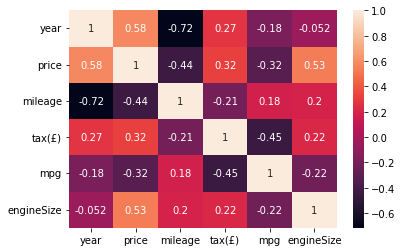

In [30]:
sns.heatmap(df.corr(), annot=True)

#7. Drop any unnecessary columns

All Columns are Fairly co-related hence not to be dropped.

#8. One Hot Encode categorical variables

In [31]:
df['Net_Price']=df.price+df['tax(£)']

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore')
Encoded_features=pd.DataFrame(ohe.fit_transform(df[['transmission','fuelType']]).toarray(),columns=ohe.get_feature_names_out(['transmission','fuelType']))

In [33]:
Train_df=df.drop(['transmission','fuelType','price','tax(£)'],axis=1).join(Encoded_features)
Train_df

,model,year,mileage,mpg,engineSize,Net_Price,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,I20,2017,17307,58.9,1.2,8144,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Tucson,2016,25233,43.5,2.0,14734,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Tucson,2016,37877,61.7,1.7,11429,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,I10,2016,23789,60.1,1.0,6519,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,IX35,2015,33177,51.4,2.0,10359,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,25906,78.4,1.6,8680,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4856,I40,2015,59508,65.7,1.7,7860,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4857,I10,2017,13810,60.1,1.0,6850,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4858,Tucson,2018,23313,44.8,1.6,14139,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#9. Spliting into train and test set

In [34]:
X=Train_df.drop(['model','Net_Price'],axis=1)
Y=Train_df.Net_Price

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=43)

#10. Scaling the Model

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#11. Training different models

## Linear regression and Polynomial regression (for Degree 2 and 3)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr=LinearRegression()
lr2=LinearRegression()
lr3=LinearRegression()
prd2= PolynomialFeatures(degree= 2)
prd3= PolynomialFeatures(degree= 3)

In [40]:
x_poly_d2= prd2.fit_transform(X_train)
x_poly_d3= prd3.fit_transform(X_train)
lr.fit(X_train,Y_train)
lr2.fit(x_poly_d2, Y_train)
lr3.fit(x_poly_d3, Y_train)

LinearRegression()

1.  Checking model accuracy for Test Data

In [41]:
from sklearn.metrics import r2_score
Y_pred=lr.predict(X_test)
poly_d2_pred = lr2.predict(prd2.transform(X_test))  
poly_d3_pred = lr3.predict(prd3.transform(X_test)) 
print("R2 Score for linear, Degree 2 and Degree 3 models are",round((r2_score(Y_test,Y_pred)),4)*100,round((r2_score(Y_test,poly_d2_pred)),4)*100,"and",round((r2_score(Y_test,poly_d3_pred)),4)*100,"respectively")

R2 Score for linear, Degree 2 and Degree 3 models are 80.67 87.29 and 90.71000000000001 respectively


2.  Checking model accuracy for Train Data

In [42]:
Y_pred=lr.predict(X_train)
poly_d2_pred = lr2.predict(prd2.transform(X_train))  
poly_d3_pred = lr3.predict(prd3.transform(X_train)) 
print("R2 Score for linear, Degree 2 and Degree 3 models are",round((r2_score(Y_train,Y_pred)),4)*100,round((r2_score(Y_train,poly_d2_pred)),4)*100,"and",round((r2_score(Y_train,poly_d3_pred)),4)*100,"respectively")

R2 Score for linear, Degree 2 and Degree 3 models are 75.67 85.35000000000001 and 89.51 respectively


## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor()

In [44]:
dc.fit(X_train,Y_train)

DecisionTreeRegressor()

1.  Checking model accuracy for Test Data

In [45]:
Y_pred=dc.predict(X_test)
print("R2 Score for Testing data is",round((r2_score(Y_test,Y_pred)),4)*100)

R2 Score for Testing data is 91.07


2.  Checking model accuracy for Train Data

In [46]:
Y_pred=dc.predict(X_train)
print("R2 Score for Testing data is",round((r2_score(Y_train,Y_pred)),4)*100)

R2 Score for Testing data is 99.92


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [48]:
no_of_decision_tree = [10,20,40,80,50]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]

In [49]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth
}

In [50]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf,param_grid=random_grid,cv=5,verbose=2,n_jobs=-1)

In [51]:
rf_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 40, 80, 50]},
             verbose=2)

In [52]:
rf_Grid.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 50}

In [53]:
rf_gscv = RandomForestRegressor(max_depth=13, max_features='log2', n_estimators=80)
rf_gscv.fit(X_train,Y_train)

RandomForestRegressor(max_depth=13, max_features='log2', n_estimators=80)

1.  Checking model accuracy for Test Data

In [54]:
Y_pred=rf_gscv.predict(X_test)
print("R2 Score for Testing data is",round((r2_score(Y_test,Y_pred)),4)*100)

R2 Score for Testing data is 93.71000000000001


2.  Checking model accuracy for Train Data

In [55]:
Y_pred=rf_gscv.predict(X_train)
print("R2 Score for Testing data is",round((r2_score(Y_train,Y_pred)),4)*100)

R2 Score for Testing data is 98.2


## SVR Model

In [56]:
from sklearn.svm import SVR
svr = SVR()

In [57]:
random_cv = {'kernel' : ['linear', 'poly', 'sigmoid'],'C' : [1,5,10],'degree' : [1,3],'coef0' : [0.01,0.10,0.5],'gamma' : ['auto','scale']}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
svr_Grid=RandomizedSearchCV(svr,random_cv,cv=5,verbose=2,n_iter = 10,n_jobs=-1,scoring='neg_mean_squared_error',random_state=42)

In [ ]:
svr_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
svr_Grid.best_params_

In [ ]:
svr_rscv = SVR(kernel='linear', gamma='scale', coef0=0.01,C=5)
svr_rscv.fit(X_train,Y_train)

1.  Checking model accuracy for Test Data

In [ ]:
Y_pred=svr_rscv.predict(X_test)
print("R2 Score for Testing data is",round((r2_score(Y_test,Y_pred)),4)*100)

2.  Checking model accuracy for Train Data

In [ ]:
Y_pred=svr_rscv.predict(X_train)
print("R2 Score for Testing data is",round((r2_score(Y_train,Y_pred)),4)*100)